# Section 1: Business Understanding
*CRISP-DM methodology for the analysis*

## Stack Overflow Survey of 2022

https://insights.stackoverflow.com/survey

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries.

There are 2 files:

- survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
- survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

We will answer these questions from the data set:

- What is the required programming language use most in Thailand?
- What is the required database use most in Thailand?
- What is the required web framework use most in Thailand?
- What are the required tools and technologies use most in Thailand?


## Import Libraries

In [55]:
# to handle datasets
import numpy as np
import pandas as pd

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns # 'seasborn' uses matplotlib

%load_ext pycodestyle_magic

# my own custom functions
import helper1 as h1

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


## Pipe Install

In [56]:
# Pipe Install
# !pip install pycodestyle pycodestyle_magic
# !pip install flake8

# Section 2: Data Understanding


Filtered out the rows where the country is Thailand.

In [57]:
# Reading Stackoverflow survey data
df2022 = pd.read_csv('data1/survey_results_public.csv')

In [58]:
# filter out only Thailand
thailand_df = df2022[df2022['Country'] == 'Thailand']
thailand_df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
358,359,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Bootstrapping a business,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,7,...,30-60 minutes a day,60-120 minutes a day,Somewhat long,Innersource initiative;DevOps function;Microse...,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,"45,899.00"
695,696,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,5,...,30-60 minutes a day,15-30 minutes a day,Just right,DevOps function;Microservices;Developer portal...,No,Yes,Yes,Appropriate in length,Easy,"17,568.00"
816,817,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Bootstrapping a business;Freelance/contr...,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Written Tutorials;Stack Overflow;Online books;...,NaN,10,...,30-60 minutes a day,30-60 minutes a day,Somewhat long,None of these,Yes,No,No,Appropriate in length,Easy,"11,244.00"


In [59]:
# These are the columns that I care about
columns_to_display = ['YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Age', 'Gender','Ethnicity','EdLevel']
thailand_df = thailand_df[columns_to_display]

In [60]:
assert thailand_df.shape == (175, 16)
thailand_df.shape # (175, 16)

(175, 16)

In [61]:
h1.divider1('*=')
print(f'There are {thailand_df.shape[0]} people who answered the survey in Thailand \nout of {df2022.shape[0]} people who answered the survey in 2022')
h1.divider1('*=')

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
There are 175 people who answered the survey in Thailand 
out of 73268 people who answered the survey in 2022
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


In [62]:
asdf1 = h1.cal_percentage(175, 73268)
h1.divider1('*=')
print(f'{asdf1}')


*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
0.24


As we can see, number of people from Thailand who participated in the survey is less than 200 people.
that is only 0.24% of the total number of people who participated in the survey. I am very dissapointed.

# Section 3: Data Preparation

In [63]:
thailand_df.columns

Index(['YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Age', 'Gender',
       'Ethnicity', 'EdLevel'],
      dtype='object')

In [64]:
thailand_df['LanguageHaveWorkedWith']

358                 C#;Dart;Go;JavaScript;Swift;TypeScript
695                                  JavaScript;TypeScript
816      C#;Go;HTML/CSS;Java;JavaScript;Kotlin;PHP;Pyth...
1325     Assembly;Bash/Shell;C;C#;C++;Clojure;Crystal;E...
1447                             Rust;Scala;SQL;TypeScript
                               ...                        
71266                Elixir;JavaScript;PHP;Ruby;TypeScript
72167    Elixir;HTML/CSS;JavaScript;Ruby;Solidity;SQL;T...
72245                                   Go;Java;PHP;Python
73037     Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL
73234    Assembly;Bash/Shell;JavaScript;PHP;Python;R;SA...
Name: LanguageHaveWorkedWith, Length: 175, dtype: object

# Define Helper Functions

Most values in each cell are multiple values separated by a semi-colon. We will split these values into a list of values\
using the custom function below.

In [65]:
def splitAndSum(df, colName):

  '''
    This function takes a dataframe and a column name as input
    and returns a series of the count of each value in the column

    input: daaframe, column name
    output: nothing
  '''
  

  # Extract the 'LanguageHaveWorkedWith' column
  dfSplit = df[colName].str.split(';', expand=True)
  dfCount = dfSplit.apply(pd.Series.value_counts).sum(axis=1)
  dfCount = dfCount.sort_values(ascending=True) # default is 'sort ascending'
  
  # dfCount.drop('xxx', inplace=True) # drop the 'xxx' value
  # lanCount.index    
  return dfCount

# Section 5: Evaluation

## What is the required programming language use most in Thailand?

In [66]:
langdf = splitAndSum(thailand_df, 'LanguageHaveWorkedWith')

In [67]:
langdf = langdf.sort_values(ascending=False)


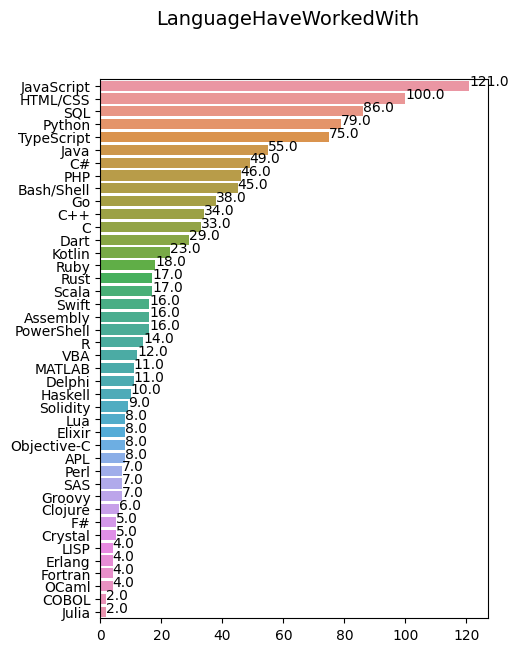

In [68]:
# langdf.plot(kind='barh', figsize=(7, 7), title='LanguageHaveWorkedWith')

fig1 = plt.figure(figsize=(5,7))
fig1.suptitle('LanguageHaveWorkedWith', fontsize=14)
sns.barplot(x=langdf, y=langdf.index, orient='h')

# add number to each bar
for index, value in enumerate(langdf):
    plt.text(value, index, str(value)) # plot.text(x, y, string value) 


By looking at the plot
- JavaScript
- HTML/CSS 
- SQL 
- Python
- TypeScript

are what is being used the most in Thailand. These are the components of a web application,\
Thus I can safely assume that most of the people who participated in the survey are web developers.

## What is the required database use most in Thailand?

In [69]:
thailand_df['DatabaseHaveWorkedWith']

358        MongoDB;MySQL;Firebase Realtime Database;SQLite
695                               MongoDB;MySQL;PostgreSQL
816          MariaDB;MongoDB;MySQL;PostgreSQL;Redis;SQLite
1325                                          MySQL;SQLite
1447     Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;...
                               ...                        
71266                                     MySQL;PostgreSQL
72167                       Elasticsearch;PostgreSQL;Redis
72245    Cloud Firestore;IBM DB2;MariaDB;MongoDB;MySQL;...
73037    Elasticsearch;Microsoft SQL Server;PostgreSQL;...
73234               Cassandra;CouchDB;MongoDB;MySQL;SQLite
Name: DatabaseHaveWorkedWith, Length: 175, dtype: object

Again, the values in each row for this column are 'seperated' by a semicolon.\
So I have to split the value in each row by a semicolon.

In [70]:
# splited1 = thailand_df['DatabaseHaveWorkedWith'].str.split(';', expand=True)
# counted1 = splited1.apply(pd.Series.value_counts).sum(axis=1)
# sorted1 = counted1.sort_values(ascending=False) # default is 'sort ascending'

database_df = splitAndSum(thailand_df, 'DatabaseHaveWorkedWith')

In [71]:
database_df = database_df.sort_values(ascending=False)

<Axes: >

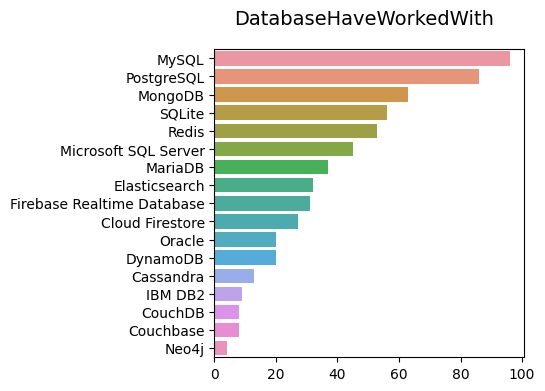

In [72]:
# database_df.plot(kind='barh', figsize=(5, 5), title='DatabaseHaveWorkedWith',  xlabel='Number of people')

fig1 = plt.figure(figsize=(4, 4))
fig1.suptitle('DatabaseHaveWorkedWith', fontsize=14)
sns.barplot(x=database_df, y=database_df.index, orient='h')

MySQL, PostgreSQL, MongoDB, and SQLite these are database use mostly in web applications;
Thus confirming the hypothesis with the 'language used' dataframe.

## What is the required web framework use most in Thailand?

In [73]:
thailand_df['WebframeHaveWorkedWith']


358                          ASP.NET Core ;Express;Node.js
695                                        Express;Node.js
816      ASP.NET;ASP.NET Core ;Django;Express;Node.js;V...
1325                                        Nuxt.js;Vue.js
1447     ASP.NET;ASP.NET Core ;Express;Gatsby;Next.js;N...
                               ...                        
71266               Laravel;Phoenix;React.js;Ruby on Rails
72167               Next.js;Phoenix;React.js;Ruby on Rails
72245                               Angular;jQuery;Laravel
73037                  ASP.NET;ASP.NET Core ;jQuery;Vue.js
73234    Angular.js;Django;Flask;jQuery;Node.js;React.j...
Name: WebframeHaveWorkedWith, Length: 175, dtype: object

In [74]:
# repeating the same process
webframe_df = splitAndSum(thailand_df, 'WebframeHaveWorkedWith')

In [75]:
webframe_df = webframe_df.sort_values(ascending=False)

<Axes: >

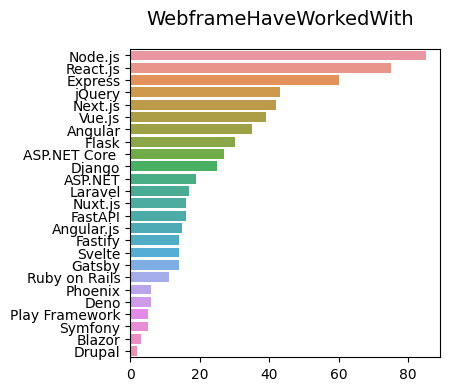

In [76]:
# webframe_df.plot(kind='barh', figsize=(5, 5), title='WebframeHaveWorkedWith',  xlabel='Number of people')

fig1 = plt.figure(figsize=(4, 4))
fig1.suptitle('WebframeHaveWorkedWith', fontsize=14)
sns.barplot(x=webframe_df, y=webframe_df.index, orient='h')

Again, all the top 5 web frameworks are JavaScript and web frameworks.
Confirming again the hypothesis with the 2 previous dataframes.

## What are the required tools and technologies use most in Thailand?

In [77]:
tooltech_df = splitAndSum(thailand_df, 'ToolsTechHaveWorkedWith')


In [78]:
tooltech_df = tooltech_df.sort_values(ascending=False)

<Axes: >

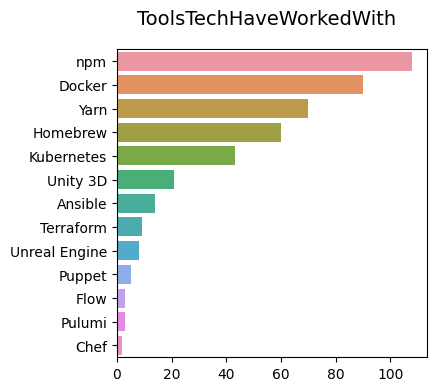

In [79]:
# tooltech_df.plot(kind='barh', figsize=(5, 5), title='ToolsTechHaveWorkedWith',  xlabel='Number of people')
fig1 = plt.figure(figsize=(4, 4))
fig1.suptitle('ToolsTechHaveWorkedWith', fontsize=14)
sns.barplot(x=tooltech_df, y=tooltech_df.index, orient='h')

npm is a tool written in JavaScript that is used for installing/uninstalling (managed) collection of codes (packages)\
npm is use mostly with Node.js; and Node.js is use to create web applications.\
We again just confirmed the hypothesis with the 3 previous dataframes.

In [80]:
devtype_df = thailand_df['DevType'].str.split(',', expand=True)
counted1 = devtype_df.apply(pd.Series.value_counts).sum(axis=1) # pd.Series.value_counts() dataframe where each cell might contain multiple values (e.g., a list of categories) 
sorted1 = counted1.sort_values(ascending=False) # default is 'sort ascending'
processed1 = sorted1[:29] # only the top 29 rows

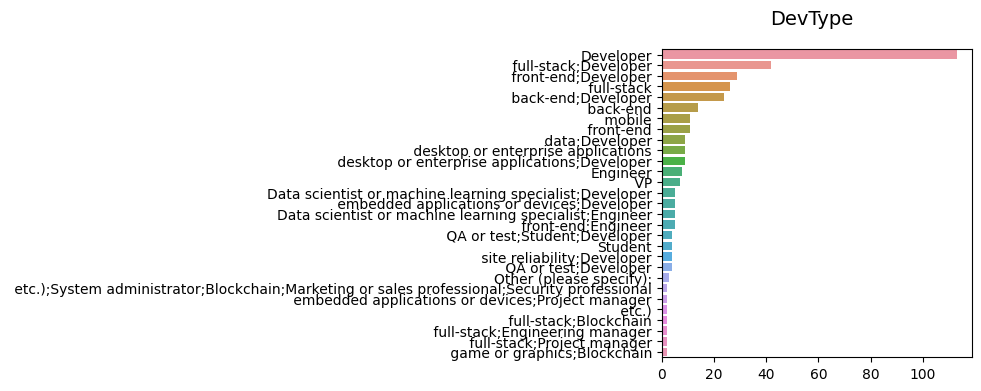

In [81]:
# processed1.plot(kind='barh', figsize=(5, 5), title='DevType',  xlabel='Number of people')

fig1 = plt.figure(figsize=(4, 4))
fig1.suptitle('DevType', fontsize=14)
sns.barplot(x=processed1, y=processed1.index, orient='h')

# roate the each label on y-axis by 45 degrees
# plt.yticks(rotation=45)
plt.show()

Notice how this last plot agrees with the hyphothesis with the top 3 'development type' are:
- full stack
- front end
- back end

## Demographic Data Analysis

In [82]:
thailand_df.columns

Index(['YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Age', 'Gender',
       'Ethnicity', 'EdLevel'],
      dtype='object')

In [83]:
selected_columns = ['EdLevel', 'Age', 'Gender', 'Country', 'Ethnicity']
q5df = thailand_df[selected_columns]

In [84]:
# i want to know how many male
q5df['Gender'].value_counts()

Gender
Man                                                            147
Woman                                                           12
Non-binary, genderqueer, or gender non-conforming                7
Man;Non-binary, genderqueer, or gender non-conforming            6
Man;Woman;Non-binary, genderqueer, or gender non-conforming      1
Prefer not to say                                                1
Name: count, dtype: int64

There are too many unique values, so I will change the value of each cell\
that is not 'Man' or 'Woman' to 'Other'.

In [85]:
# making new function
def categorize_gender(gender):
    """
    check for 'Man' or 'Woman' string and 'return' whatever string is found
    otherwise, return 'Other'

    input: string
    output: string
    """

    if gender in ['Man', 'Woman']:
        return gender
    else:
        return 'Other'


In [86]:
# q5df[:, 'Gender'] means, all ROWS and column 'Gender'
q5df.loc[:, 'Gender'] = q5df['Gender'].apply(categorize_gender)

q5df['Gender'].value_counts()

Gender
Man      147
Other     16
Woman     12
Name: count, dtype: int64

In [87]:
# for reference
q5df['EdLevel'].value_counts().index
# this gives you a list of 'index' 

Index(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Professional degree (JD, MD, etc.)',
       'Associate degree (A.A., A.S., etc.)'],
      dtype='object', name='EdLevel')

In [88]:
q5df['Ethnicity'].value_counts().index

Index(['Asian', 'Southeast Asian', 'Asian;Southeast Asian', 'European',
       'White', 'White;European', 'Prefer not to say', 'Indian',
       'Asian;East Asian', 'Middle Eastern', 'Multiracial', 'Biracial',
       'White;Or, in your own words:;European', 'White;Multiracial',
       'White;Or, in your own words:;European;Ethnoreligious group;Asian;East Asian;Hispanic or Latino/a;South Asian;Multiracial;Biracial',
       'White;Indian;European;North American;Middle Eastern;Ethnoreligious group;African;Asian;East Asian;Black;Caribbean;Southeast Asian;Central American;North African;Hispanic or Latino/a;South American;South Asian;Multiracial;Biracial;Indigenous (such as Native American or Indigenous Australian);Pacific Islander;Central Asian',
       'Asian;Southeast Asian;Biracial', 'Indian;Asian',
       'Or, in your own words:', 'East Asian',
       'Asian;East Asian;Indigenous (such as Native American or Indigenous Australian)',
       'South Asian', 'Or, in your own words:;Asian',
  

You can see that really 'long answer' which will cause a problem when we plot the data.\
Thus, I will limit the maximum 'string length' to 50 characters.\
Anything longer than 50 characters will be  'filtered out'.

In [89]:
max_length = 50  # Define the maximum length you want to drop
q5df = q5df[q5df['Ethnicity'].str.len() <= max_length]

In [90]:
q5df['Ethnicity'].value_counts().index

Index(['Asian', 'Southeast Asian', 'Asian;Southeast Asian', 'European',
       'White', 'White;European', 'Prefer not to say', 'Indian',
       'Asian;East Asian', 'Middle Eastern', 'South Asian',
       'Or, in your own words:;Asian', 'Asian;Southeast Asian;Biracial',
       'East Asian', 'Or, in your own words:', 'Indian;Asian', 'Multiracial',
       'White;Multiracial', 'White;Or, in your own words:;European',
       'Biracial'],
      dtype='object', name='Ethnicity')

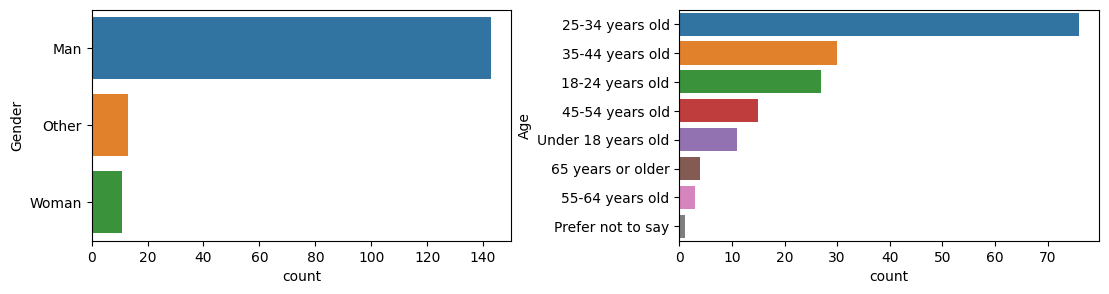

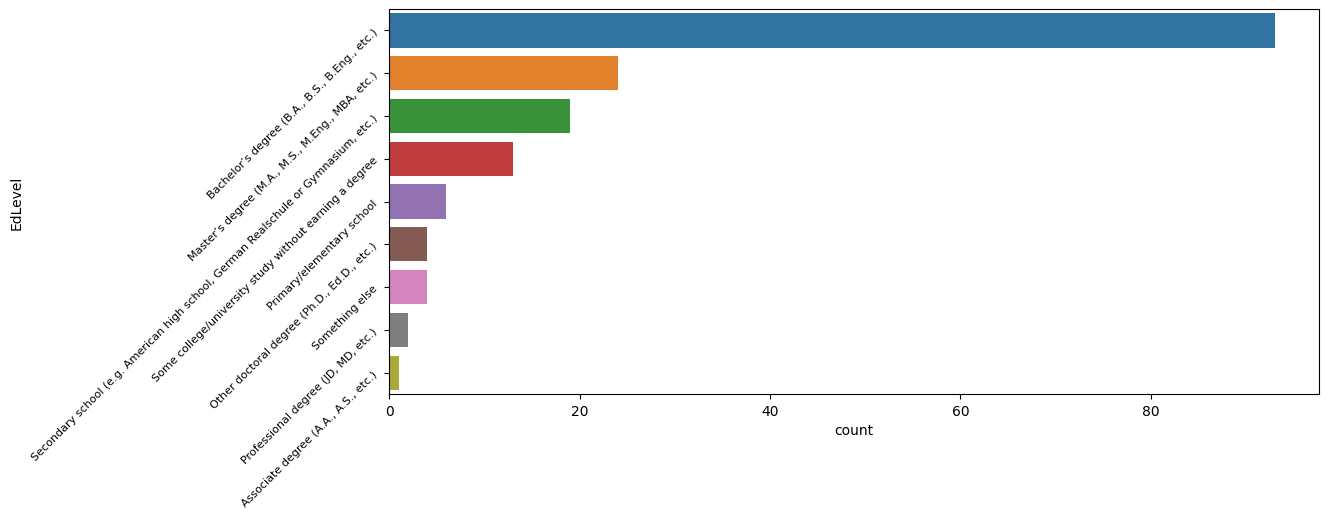

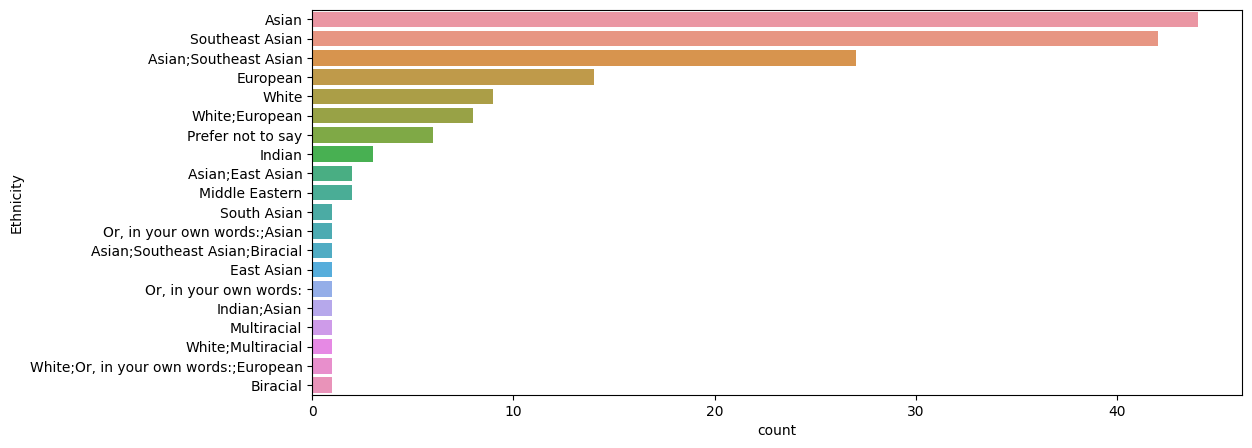

In [91]:
# making a 1 row, 2 columns and the 'figure size' is 3x3
fig1, ax1 =  plt.subplots(1, 2, figsize=(13, 3)) 
sns.countplot(y='Gender', data=q5df, order=q5df['Gender'].value_counts().index, ax=ax1[0])
sns.countplot(y='Age', data=q5df, order=q5df['Age'].value_counts().index, ax=ax1[1])

plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal spacing between subplots, yes1

edlevel_counts = q5df['EdLevel'].value_counts()
fig2, ax2 =  plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(y='EdLevel', data=q5df, order=q5df['EdLevel'].value_counts().index)
# ax2.set_ylabel('Education Level', rotation=5, ha='right')  # Rotate the y-label on the single subplot
ax2.set_yticks(range(len(edlevel_counts)))  # Set the tick locations
ax2.set_yticklabels(edlevel_counts.index, rotation=45, fontsize=8)  # Set the labels and rotate them

fig3 = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(y='Ethnicity', data=q5df, order=q5df['Ethnicity'].value_counts().index)

plt.show()

You can see that even for a really small data 'sample', most of the programmers are:
- Male
- between 25-34 years old.
- have a bachelor's degree or Master's degree, respectively.
- and most are Asian and a few European (because this is a survey from Thailand)

## Analysis of Employer

In [92]:
column1 = ['YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 
       'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Age', 'Gender',
       'Ethnicity']

asdf2 = thailand_df.groupby(['OrgSize']).count().sum(axis=1).sort_values(ascending=False)

# Convert the series to a DataFrame and reset the index
df_asdf2 = asdf2.reset_index()

# Rename columns for clarity
df_asdf2.columns = ['OrgSize', 'Count']
df_asdf2

,OrgSize,Count
0,20 to 99 employees,316
1,100 to 499 employees,277
2,"Just me - I am a freelancer, sole proprietor, ...",259
3,10 to 19 employees,244
4,"1,000 to 4,999 employees",215
5,2 to 9 employees,124
6,"10,000 or more employees",96
7,500 to 999 employees,80
8,"5,000 to 9,999 employees",53
9,I don’t know,53


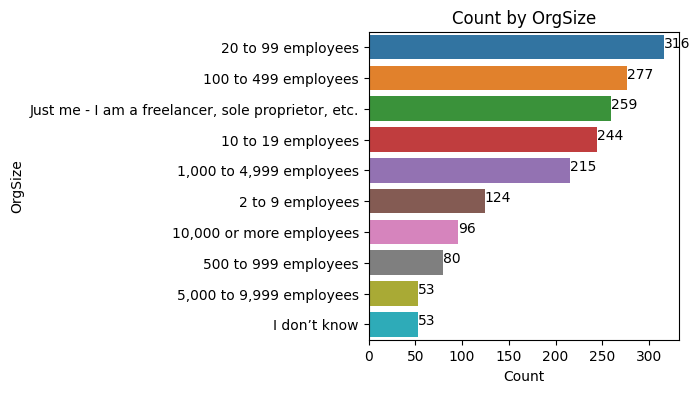

In [93]:
# Create the bar plot
plt.figure(figsize=(4,4))
sns.barplot(x='Count', y='OrgSize', data=df_asdf2, orient='h')

# putting the 'numbers (string)' on the bar
for index, value in enumerate(df_asdf2['Count']):
    plt.text(value, index, str(value)) # plot.text(x, y, string value)

plt.title('Count by OrgSize')
plt.xlabel('Count')
plt.ylabel('OrgSize')
plt.show()

We can see that most people are working for:
- small company or medium size company
- freelancing

In [94]:
thailand_df.groupby(['CompTotal']).count().sum(axis=1).sort_values(ascending=False).reset_index()
something1 = thailand_df.groupby(['OrgSize'])['CompFreq'].value_counts().reset_index()
something1 # << this is a dataframe, you can't use dataframe for plotting


,OrgSize,CompFreq,count
0,"1,000 to 4,999 employees",Monthly,12
1,"1,000 to 4,999 employees",Yearly,3
2,10 to 19 employees,Monthly,10
3,10 to 19 employees,Yearly,6
4,10 to 19 employees,Weekly,1
5,"10,000 or more employees",Yearly,4
6,"10,000 or more employees",Monthly,1
7,100 to 499 employees,Monthly,15
8,100 to 499 employees,Yearly,3
9,2 to 9 employees,Monthly,5


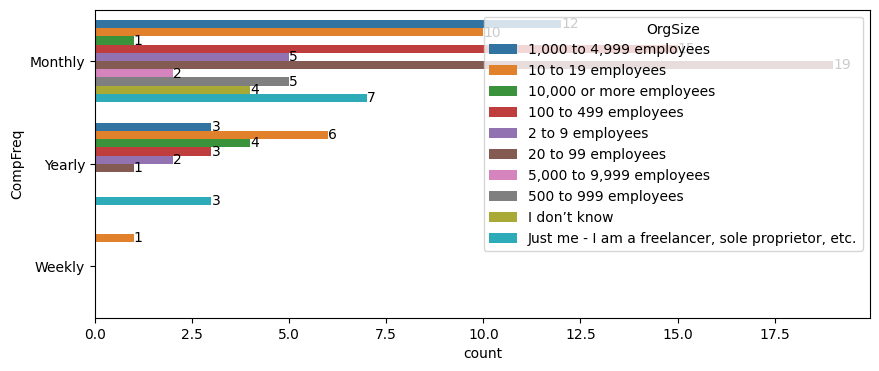

In [95]:

# Create the bar plot
plt.figure(figsize=(10,4))

# the 'hue' 'parameter' is to 'group variable' in this case, 'OrgSize'
ax = sns.barplot(x='count', y='CompFreq', hue='OrgSize', data=something1)

# Add the count labels to the bars
for p in ax.patches:
    count = p.get_width()
    if not pd.isna(count):
        ax.text(count, p.get_y() + p.get_height() / 2, int(count), ha='left', va='center')

# Show the plot
plt.show()


Most companies pay out the salary on a 'monthly' basis.

In [96]:
# selecting only 'Thai baht' currency
baht_df = thailand_df[thailand_df['Currency'] == 'THB\tThai baht']
baht_df_monthly = baht_df[ baht_df['CompFreq'] == 'Monthly']

# Group the data by 'OrgSize' and 'CompTotal' (using OrgSize and CompTotal as 'index')and 'count'
asdf1 = baht_df_monthly.groupby(['OrgSize', 'CompTotal']).count().sum(axis=1)

# Get unique 'OrgSize' values
org_sizes = thailand_df['OrgSize'].dropna().unique()


Above you see the 'count' of the 'salary range' for each company size

No data for OrgSize: 10,000 or more employees


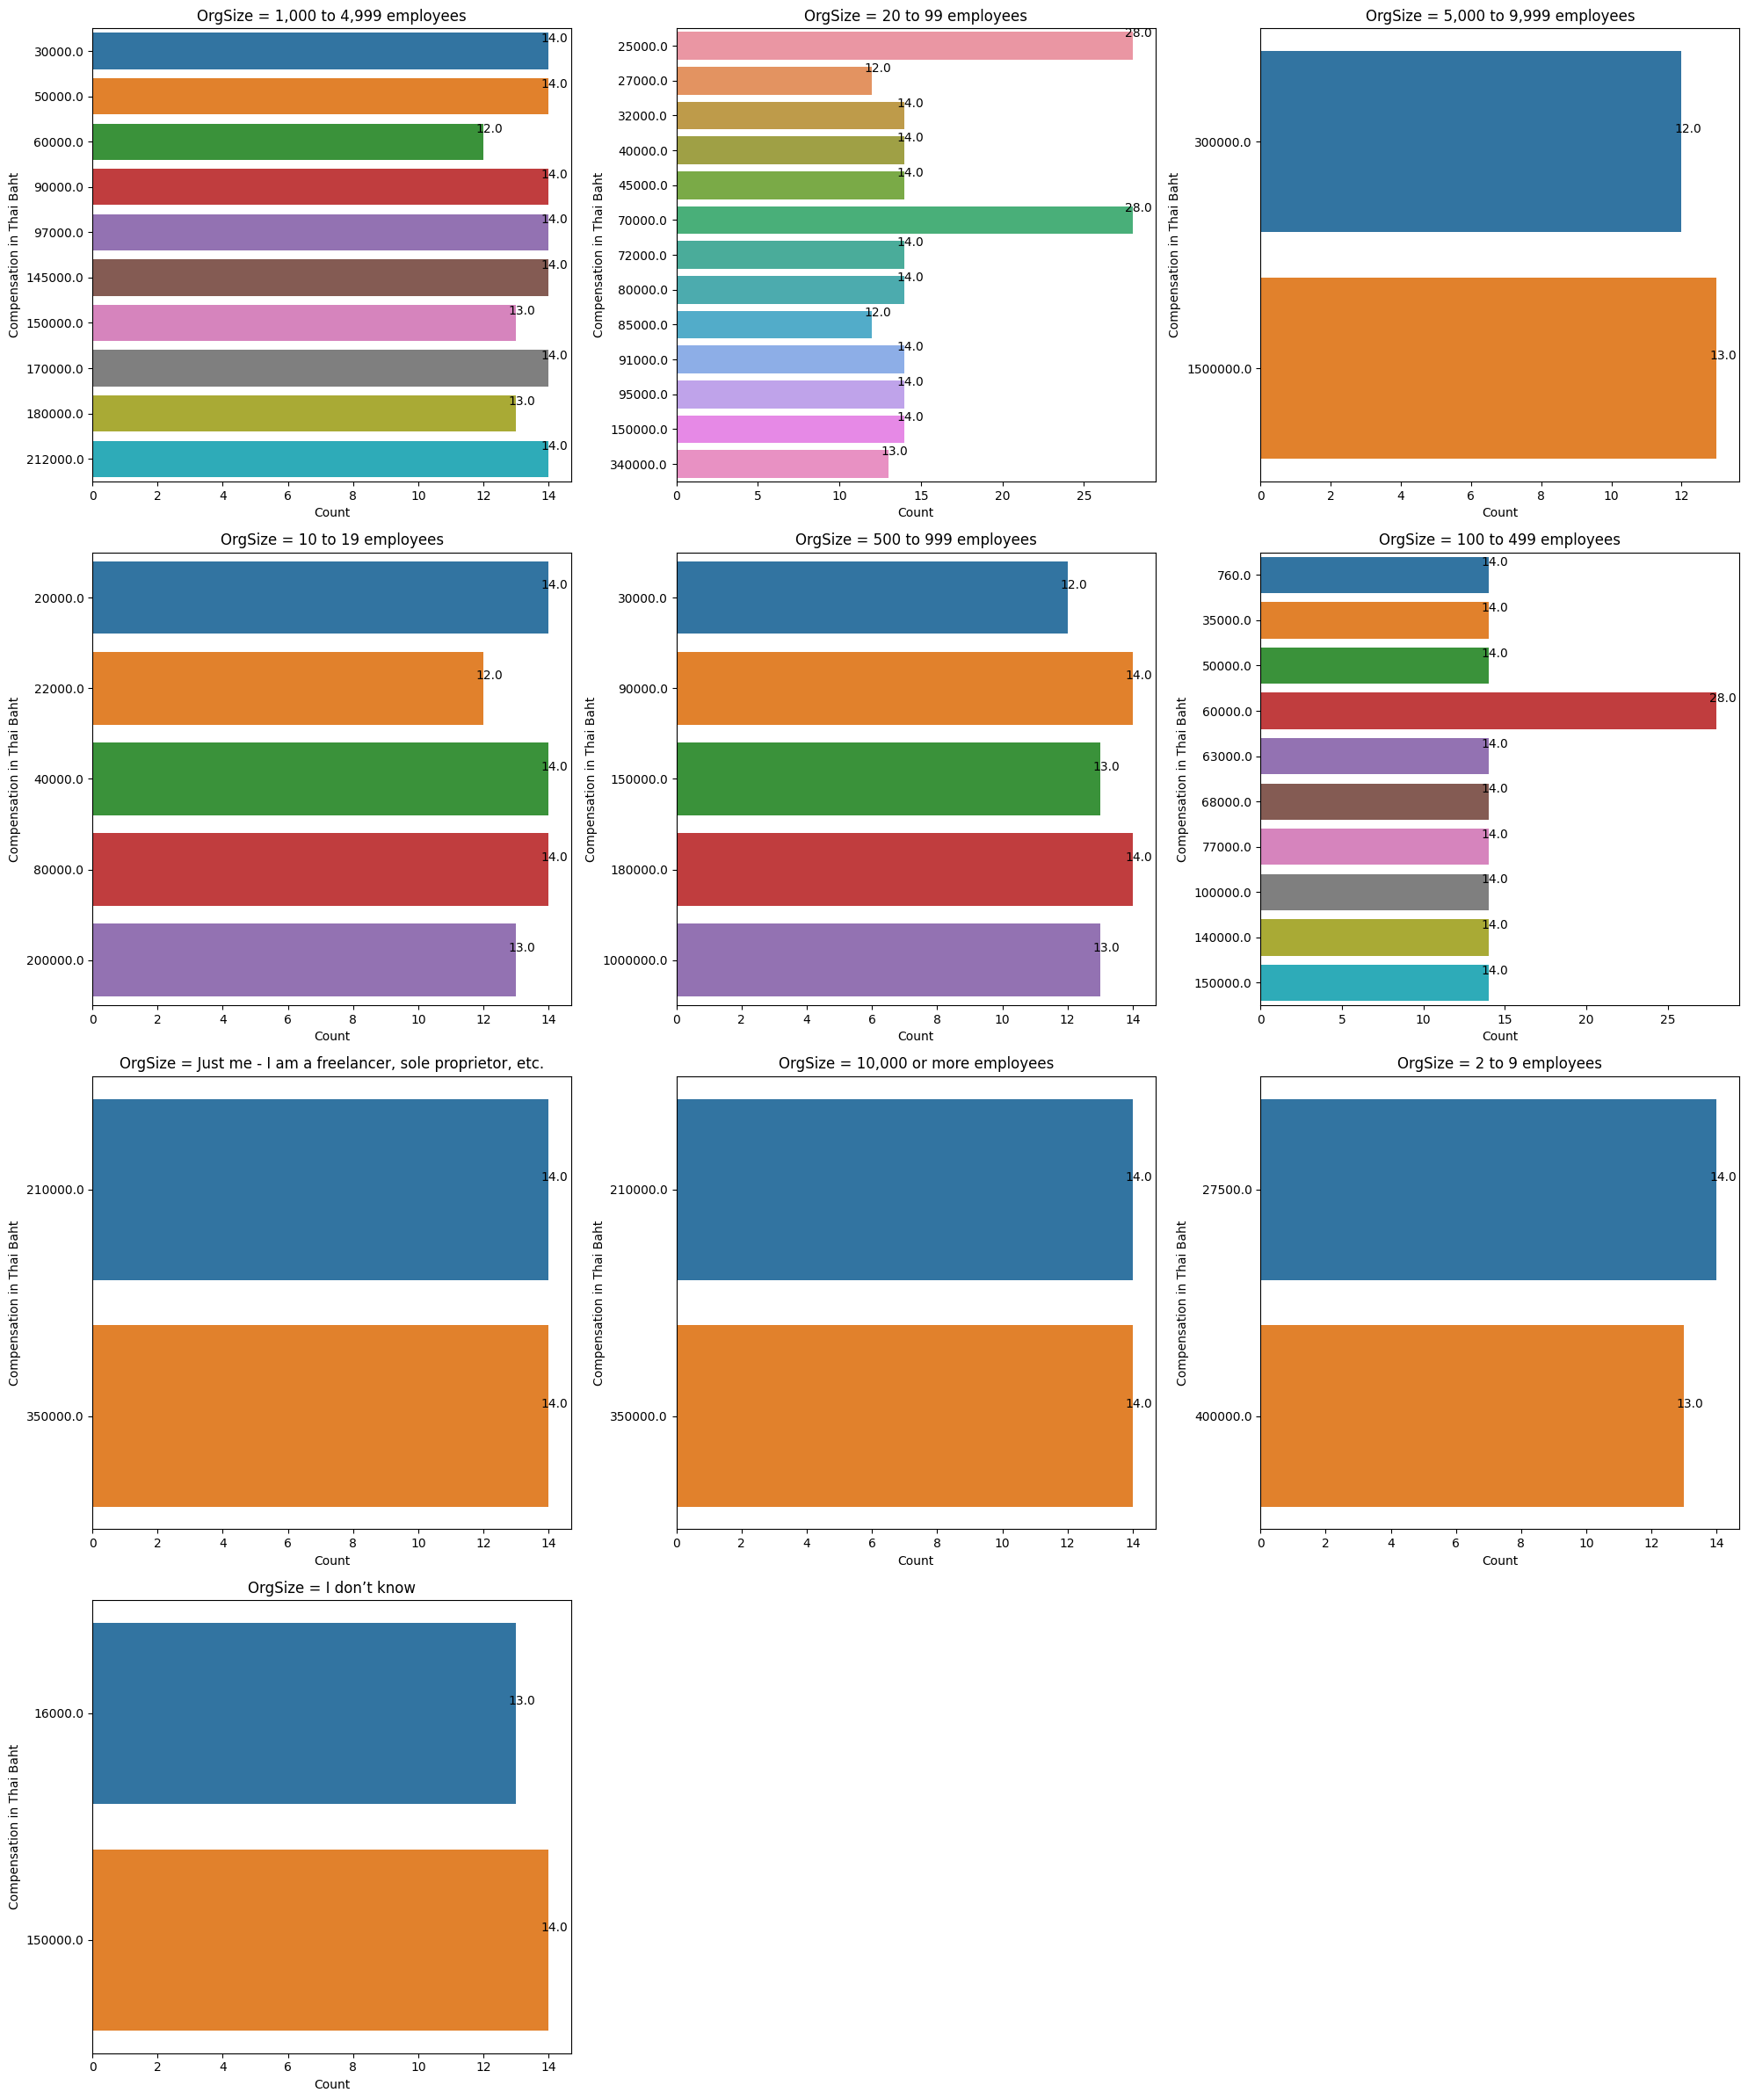

In [97]:
# Define the number of columns and rows for the subplots
ncols = 3
nrows = int(np.ceil(len(org_sizes) / ncols))

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*6))

# Flatten the axes array, to make indexing easier
axes = axes.flatten()

# Loop over 'OrgSize' values and axes
for org_size, ax in zip(org_sizes, axes):


    if org_size in asdf1.index:
        # Filter data for the specific 'OrgSize'
        filtered_data = asdf1.loc[org_size]
        # print(filtered_data)
    else:
        print(f"No data for OrgSize: {org_size}")

    # Convert the filtered data to a DataFrame and reset the index
    df_filtered = filtered_data.reset_index()

    # Rename columns for clarity
    df_filtered.columns = ['CompTotal', 'Count']

    # Plot using seaborn
    barplot = sns.barplot(x='Count', y='CompTotal', data=df_filtered, ax=ax, orient='h')
    ax.set_title(f'OrgSize = {org_size}')

    # Set y-label
    ax.set_ylabel('Compensation in Thai Baht')

    # Add value annotations to the bars
    for p in barplot.patches:
        ax.annotate(format(p.get_width(), '.1f'), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   xytext = (5, 10), 
                   textcoords = 'offset points')

# Remove empty subplots
for ax in axes[len(org_sizes):]:
    ax.remove()

plt.tight_layout()
plt.show()

Above are plots for each 'company size' and 'salary range'\
that pay out the salary on a 'monthly' basis.

In [98]:
# Set the display options to control number formatting
pd.options.display.float_format = '{:,.2f}'.format

# Calculate and display the summary statistics
# baht_df['CompTotal'].describe()
_ = baht_df[ baht_df['CompFreq'] == 'Monthly']
_.groupby(['OrgSize'])['CompTotal'].describe().sort_values(by='count', ascending=False)


,count,mean,std,min,25%,50%,75%,max
OrgSize,,,,,,,,
20 to 99 employees,15.00,"83,133.33","78,819.75","25,000.00","36,000.00","70,000.00","88,000.00","340,000.00"
100 to 499 employees,11.00,"73,069.09","43,379.22",760.00,"55,000.00","63,000.00","88,500.00","150,000.00"
"1,000 to 4,999 employees",10.00,"118,400.00","61,547.09","30,000.00","67,500.00","121,000.00","165,000.00","212,000.00"
10 to 19 employees,5.00,"72,400.00","75,291.43","20,000.00","22,000.00","40,000.00","80,000.00","200,000.00"
500 to 999 employees,5.00,"290,000.00","401,061.09","30,000.00","90,000.00","150,000.00","180,000.00","1,000,000.00"
2 to 9 employees,2.00,"213,750.00","263,397.28","27,500.00","120,625.00","213,750.00","306,875.00","400,000.00"
"5,000 to 9,999 employees",2.00,"900,000.00","848,528.14","300,000.00","600,000.00","900,000.00","1,200,000.00","1,500,000.00"
I don’t know,2.00,"83,000.00","94,752.31","16,000.00","49,500.00","83,000.00","116,500.00","150,000.00"
"Just me - I am a freelancer, sole proprietor, etc.",2.00,"280,000.00","98,994.95","210,000.00","245,000.00","280,000.00","315,000.00","350,000.00"


The 'average' salary for small and medium size company are 84,000 and 73,000 respectively.\
in terms of US dollars, it would be:
- 84,000/34 = 2,470 USD 
- 73,000/34 = 2,147 USD

per month; which is decent (if the data are accurate).

(using the exchange rate of 1 USD = 34 THB)

In [99]:
df2022.shape

(73268, 79)

# Conclusion

The dataset from Thailand is very small, 170 'samples.' out of 73268\
we saw that most programmers in Thailand are:
- Mostly male
- between 25-34 years old.
- have a bachelor's degree or Master's degree, respectively.
- and most are Asian and a few European (because this is a survey from Thailand)
- working for small or medium size company
- Most developers are web developers
- with 'average' salary of 2,470 USD per month